# Load Segy to Numpy

Date: August, 21st, 2023

Author: Roderick Perez

In [236]:
import segyio
import numpy as np
import matplotlib.pyplot as plt
import os

### InfoPetrol DataSet

In [237]:
# Load the segy files
filePath_noisy = '/media/roderickperez/Seagate Desktop Drive (8 Tb)1/Documents/DS_Projects/Denoising_Seismic_AutoEncoder/data/InforPetrol/seismic/InfoP_noisy.segy'
filePath_noiseless = '/media/roderickperez/Seagate Desktop Drive (8 Tb)1/Documents/DS_Projects/Denoising_Seismic_AutoEncoder/data/InforPetrol/seismic/InfoP_noiseless.segy'

In [238]:
with segyio.open(filePath_noisy, mode = "r", iline = 5, xline = 21) as s:
    cubeNoisy = segyio.cube(s)

In [239]:
with segyio.open(filePath_noiseless, mode = "r", iline = 5, xline = 21) as s:
    cubeNoiseless = segyio.cube(s)

In [240]:
cubeNoisy.shape

(351, 4097, 1751)

In [241]:
cubeNoiseless.shape

(351, 4097, 1751)

In [242]:
amplitude_max = np.percentile(cubeNoisy, 98)
amplitude_max

7.233442306518555

In [243]:
inline = 125
xline = 2045
time = 100

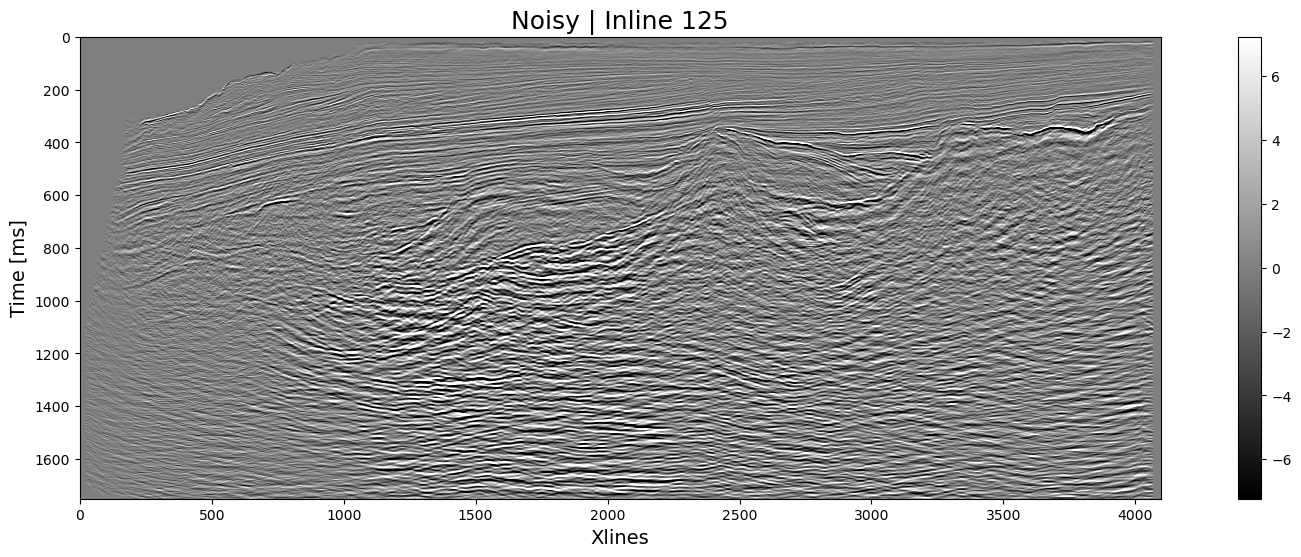

In [244]:
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[inline, :, :].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Xlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noisy | Inline %d' %inline, fontsize = 18)
plt.savefig('/media/roderickperez/Seagate Desktop Drive (8 Tb)1/Documents/DS_Projects/Denoising_Seismic_AutoEncoder/images/Noisy_Inline_%d.png' %inline)
plt.show()

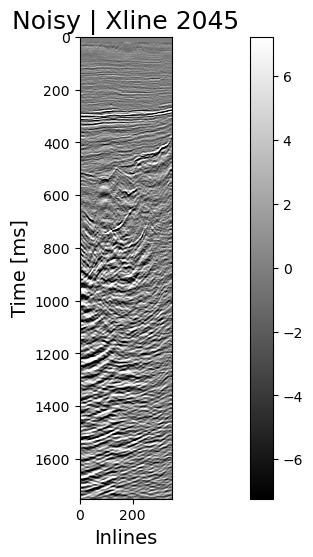

In [245]:
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[:, xline, :].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Inlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noisy | Xline %d' %xline, fontsize = 18)
plt.savefig('/media/roderickperez/Seagate Desktop Drive (8 Tb)1/Documents/DS_Projects/Denoising_Seismic_AutoEncoder/images/Noisy_Xline_%d.png' %xline)
plt.show()

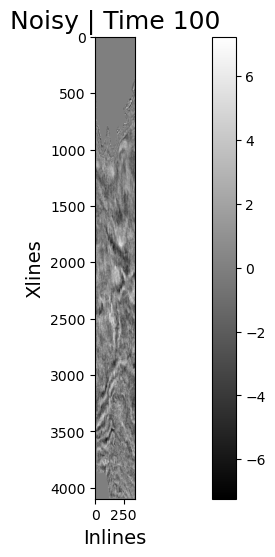

In [246]:
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[:, :, time].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Inlines', fontsize = 14)
plt.ylabel('Xlines', fontsize = 14)
plt.title('Noisy | Time %d' %time, fontsize = 18)
plt.savefig('/media/roderickperez/Seagate Desktop Drive (8 Tb)1/Documents/DS_Projects/Denoising_Seismic_AutoEncoder/images/Noisy_Time_%d.png' %time)
plt.show()

In [247]:
patchSize = 256

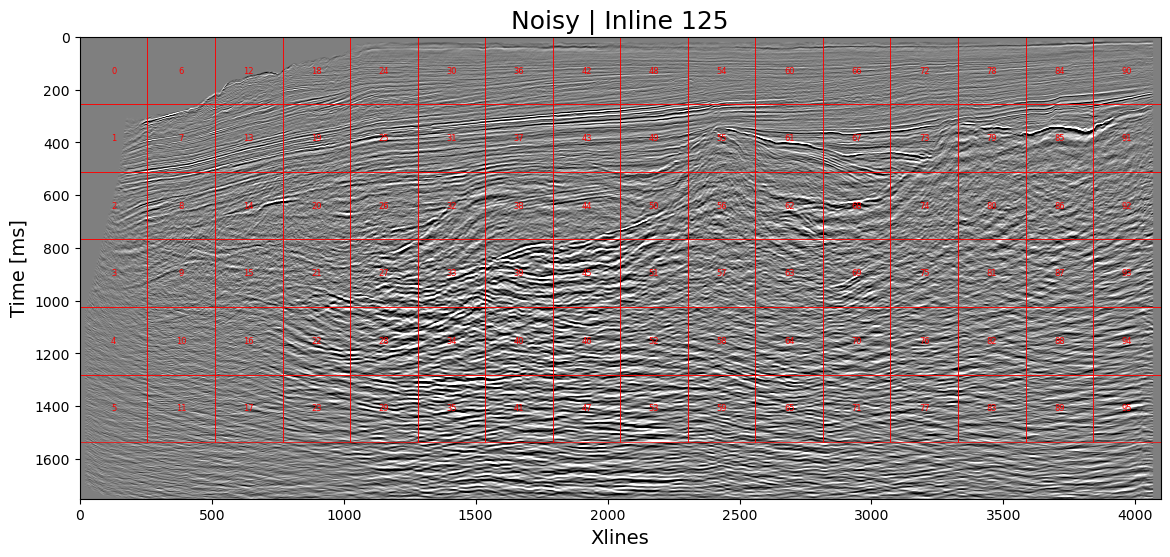

In [248]:
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[inline, :, :].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)

xline_num_patches = cubeNoisy.shape[1] // patchSize 
time_num_patches = cubeNoisy.shape[2] // patchSize 

for m in range(xline_num_patches):
    for n in range(time_num_patches):
        i = m*patchSize+patchSize//2
        j = n*patchSize+patchSize//2
        rect = plt.Rectangle((m*patchSize, n*patchSize), patchSize, patchSize, linewidth=0.5, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(i, j, str(m*time_num_patches+n), color='r', fontsize=6, ha='center', va='center')

plt.xlabel('Xlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noisy | Inline %d' %inline, fontsize = 18)
plt.savefig('/media/roderickperez/Seagate Desktop Drive (8 Tb)1/Documents/DS_Projects/Denoising_Seismic_AutoEncoder/images/Noisy_Patches_Inline_%d.png' %inline, dpi = 500)
plt.show()

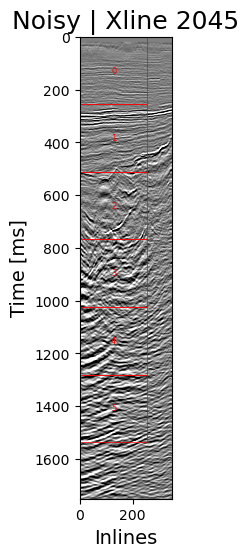

In [249]:
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[:, xline, :].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)

inline_num_patches = cubeNoisy.shape[0] // patchSize 
time_num_patches = cubeNoisy.shape[2] // patchSize 

for m in range(inline_num_patches):
    for n in range(time_num_patches):
        i = m*patchSize+patchSize//2
        j = n*patchSize+patchSize//2
        rect = plt.Rectangle((m*patchSize, n*patchSize), patchSize, patchSize, linewidth=0.5, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(i, j, str(m*time_num_patches+n), color='r', fontsize=6, ha='center', va='center')

plt.xlabel('Inlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noisy | Xline %d' %xline, fontsize = 18)
plt.savefig('/media/roderickperez/Seagate Desktop Drive (8 Tb)1/Documents/DS_Projects/Denoising_Seismic_AutoEncoder/images/Noisy_Patches_Xline_%d.png' %xline, dpi = 500)
plt.show()

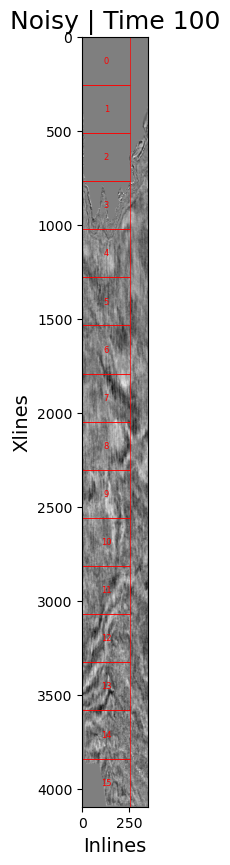

In [250]:
plt.figure(figsize=(20, 10))
plt.imshow(cubeNoisy[:, :, time].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)

inline_num_patches = cubeNoisy.shape[0] // patchSize 
xline_num_patches = cubeNoisy.shape[1] // patchSize 

for m in range(inline_num_patches):
    for n in range(xline_num_patches):
        i = m*patchSize+patchSize//2
        j = n*patchSize+patchSize//2
        rect = plt.Rectangle((m*patchSize, n*patchSize), patchSize, patchSize, linewidth=0.5, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(i, j, str(m*xline_num_patches+n), color='r', fontsize=6, ha='center', va='center')

plt.xlabel('Inlines', fontsize = 14)
plt.ylabel('Xlines', fontsize = 14)
plt.title('Noisy | Time %d' %time, fontsize = 18)
plt.savefig('/media/roderickperez/Seagate Desktop Drive (8 Tb)1/Documents/DS_Projects/Denoising_Seismic_AutoEncoder/images/Noisy_Patches_Time_%d.png' %time, dpi = 500)
plt.show()

### Generate Patches

In [251]:
cubeNoisy.shape

(351, 4097, 1751)

In [252]:
inline_num_patches = cubeNoisy.shape[0] // patchSize
xline_num_patches = cubeNoisy.shape[1] // patchSize
time_num_patches = cubeNoisy.shape[2] // patchSize

In [253]:
print('Number of patches in inline direction: %d' %(xline_num_patches*time_num_patches))
print('Number of patches in xline direction: %d' %(inline_num_patches*time_num_patches))
print('Number of patches in time direction: %d' %(inline_num_patches*xline_num_patches))

Number of patches in inline direction: 96
Number of patches in xline direction: 6
Number of patches in time direction: 16


In [254]:
print('Total number of INLINE patches: %d' %((xline_num_patches*time_num_patches)*cubeNoisy.shape[0]))
print('Total number of XLINE patches: %d' %((inline_num_patches*time_num_patches)*cubeNoisy.shape[1]))
print('Total number of TIME patches: %d' %((inline_num_patches*xline_num_patches)*cubeNoisy.shape[2]))

Total number of INLINE patches: 33696
Total number of XLINE patches: 24582
Total number of TIME patches: 28016


In [255]:
# Extract the individual patches in the INLINE direction
inline_patches = {}
count = 0
for i in range(cubeNoisy.shape[0]):
    for j in range(xline_num_patches):
        for k in range(time_num_patches):
            patch = cubeNoisy[i, j*patchSize:(j+1)*patchSize, k*patchSize:(k+1)*patchSize].T
            inline_patches[count] = patch
            count += 1

In [256]:
len(inline_patches)

33696

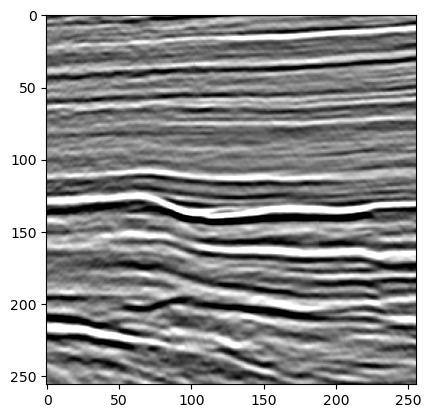

In [257]:
plt.imshow(inline_patches[67], cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)

In [258]:
# Save the individual patches as separate .npy arrays
for i in range(len(inline_patches)):
    np.save(f'/media/roderickperez/Seagate Desktop Drive (8 Tb)1/Documents/DS_Projects/Denoising_Seismic_AutoEncoder/data/InforPetrol/patches_size_256/inline_patches/inline_2D_patch_{i}.npy', inline_patches[i])

In [259]:
# Extract the individual patches in the INLINE direction
inline_patches = {}
count = 0
for i in range(cubeNoisy.shape[0]):
    for j in range(xline_num_patches):
        for k in range(time_num_patches):
            patch = cubeNoisy[i, j*patchSize:(j+1)*patchSize, k*patchSize:(k+1)*patchSize].T
            inline_patches[count] = patch
            count += 1

In [260]:
# Extract the individual patches in the XLINE direction
xline_patches = {}
count = 0
for i in range(cubeNoisy.shape[1]):
    for j in range(inline_num_patches):
        for k in range(time_num_patches):
            patch = cubeNoisy[j*patchSize:(j+1)*patchSize, i, k*patchSize:(k+1)*patchSize].T
            xline_patches[count] = patch
            count += 1

In [261]:
len(xline_patches)

24582

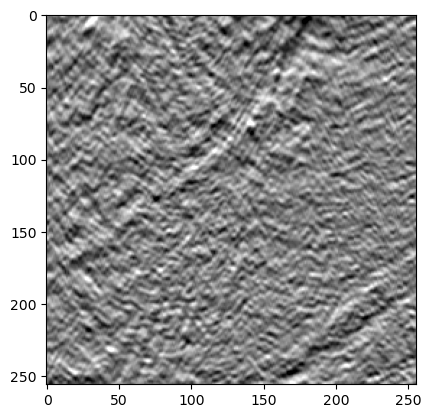

In [ ]:
plt.imshow(xline_patches[2481], cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)

In [265]:
# Save the individual patches as separate .npy arrays
for i in range(len(inline_patches)):
    np.save(f'/media/roderickperez/Seagate Desktop Drive (8 Tb)1/Documents/DS_Projects/Denoising_Seismic_AutoEncoder/data/InforPetrol/patches_size_256/xline_patches/xline_2D_patch_{i}.npy', xline_patches[i])

KeyError: 24582

In [266]:
# Extract the individual patches in the TIME direction
time_patches = {}
count = 0

for i in range(cubeNoisy.shape[2]):
    for j in range(inline_num_patches):
        for k in range(xline_num_patches):
            patch = cubeNoisy[j*patchSize:(j+1)*patchSize, k*patchSize:(k+1)*patchSize, i].T
            time_patches[count] = patch
            count += 1

In [267]:
len(time_patches)

28016

In [268]:
time_patches[1999].shape

(256, 256)

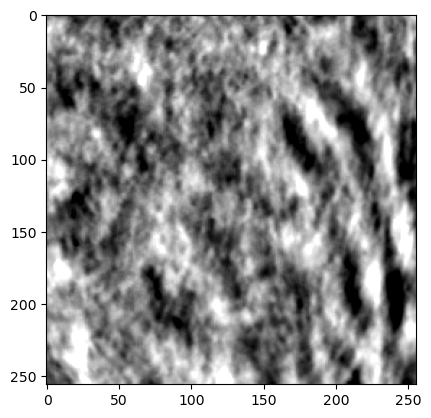

In [269]:
plt.imshow(time_patches[19939], cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)

In [270]:
# Save the individual patches as separate .npy arrays
for i in range(len(time_patches)):
    np.save(f'/media/roderickperez/Seagate Desktop Drive (8 Tb)1/Documents/DS_Projects/Denoising_Seismic_AutoEncoder/data/InforPetrol/patches_size_256/time_patches/time_2D_patch_{i}.npy', time_patches[i])